In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import os

# Arbol de Regresión

Cargar Datos

In [35]:
df = pd.read_csv('train_preprocessed.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Exterior1st.VinylSd,Exterior1st.Wd Sdng,Exterior2nd.MetalSd,Exterior2nd.Other,Exterior2nd.Plywood,Exterior2nd.VinylSd,Exterior2nd.Wd Sdng,TotalArea,HouseAge,TotalBath
0,-1.730272,0.073350,RL,0.212804,-0.127058,Pave,NaN,Reg,Lvl,AllPub,...,1.35414,-0.405169,-0.414285,-0.393646,-0.328124,1.376781,-0.394805,-0.219231,-1.042902,1.641693
1,-1.727900,-0.872264,RL,0.645526,0.131859,Pave,NaN,Reg,Lvl,AllPub,...,-0.73797,-0.405169,2.412145,-0.393646,-0.328124,-0.725834,-0.394805,0.371546,-0.183402,0.368454
2,-1.725528,0.073350,RL,0.299349,0.453703,Pave,NaN,IR1,Lvl,AllPub,...,1.35414,-0.405169,-0.414285,-0.393646,-0.328124,1.376781,-0.394805,0.011436,-0.976787,1.641693
3,-1.723156,0.309753,RL,0.068564,0.121263,Pave,NaN,IR1,Lvl,AllPub,...,-0.73797,2.466416,-0.414285,2.538614,-0.328124,-0.725834,-0.394805,-0.230381,1.800059,-0.268165
4,-1.720785,0.073350,RL,0.760919,0.934818,Pave,NaN,IR1,Lvl,AllPub,...,1.35414,-0.405169,-0.414285,-0.393646,-0.328124,1.376781,-0.394805,0.854205,-0.943729,1.641693


Variables Predictorias y Objetivo

In [36]:
y = df.pop("SalePrice")
X = df

X.head(), y.head()

(         Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
 0 -1.730272    0.073350       RL     0.212804 -0.127058   Pave   NaN      Reg   
 1 -1.727900   -0.872264       RL     0.645526  0.131859   Pave   NaN      Reg   
 2 -1.725528    0.073350       RL     0.299349  0.453703   Pave   NaN      IR1   
 3 -1.723156    0.309753       RL     0.068564  0.121263   Pave   NaN      IR1   
 4 -1.720785    0.073350       RL     0.760919  0.934818   Pave   NaN      IR1   
 
   LandContour Utilities  ... Exterior1st.VinylSd Exterior1st.Wd Sdng  \
 0         Lvl    AllPub  ...             1.35414           -0.405169   
 1         Lvl    AllPub  ...            -0.73797           -0.405169   
 2         Lvl    AllPub  ...             1.35414           -0.405169   
 3         Lvl    AllPub  ...            -0.73797            2.466416   
 4         Lvl    AllPub  ...             1.35414           -0.405169   
 
   Exterior2nd.MetalSd Exterior2nd.Other  Exterior2nd.Plywood  \
 

Variables Categóricas Y Numéricas, Procesamiento de Datos

In [37]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_columns),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])


Entrenamiento y Prueba

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((818, 102), (351, 102))

Max Depth

In [39]:
# Crear el pipeline con preprocesamiento y regresor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(min_samples_split=10, random_state=42))
])

param_grid = {
    "regressor__max_depth": np.arange(2, 10, 1)
}

modelo1 = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=-1, cv=5, scoring="neg_root_mean_squared_error")
modelo1.fit(X_train, y_train)

print("Mejores parámetros:", modelo1.best_params_)

Mejores parámetros: {'regressor__max_depth': 6}


Evaluación y Visualizacion del Modelo

MSE: 0.25383613641711156
R² Score: 0.7515392480592058


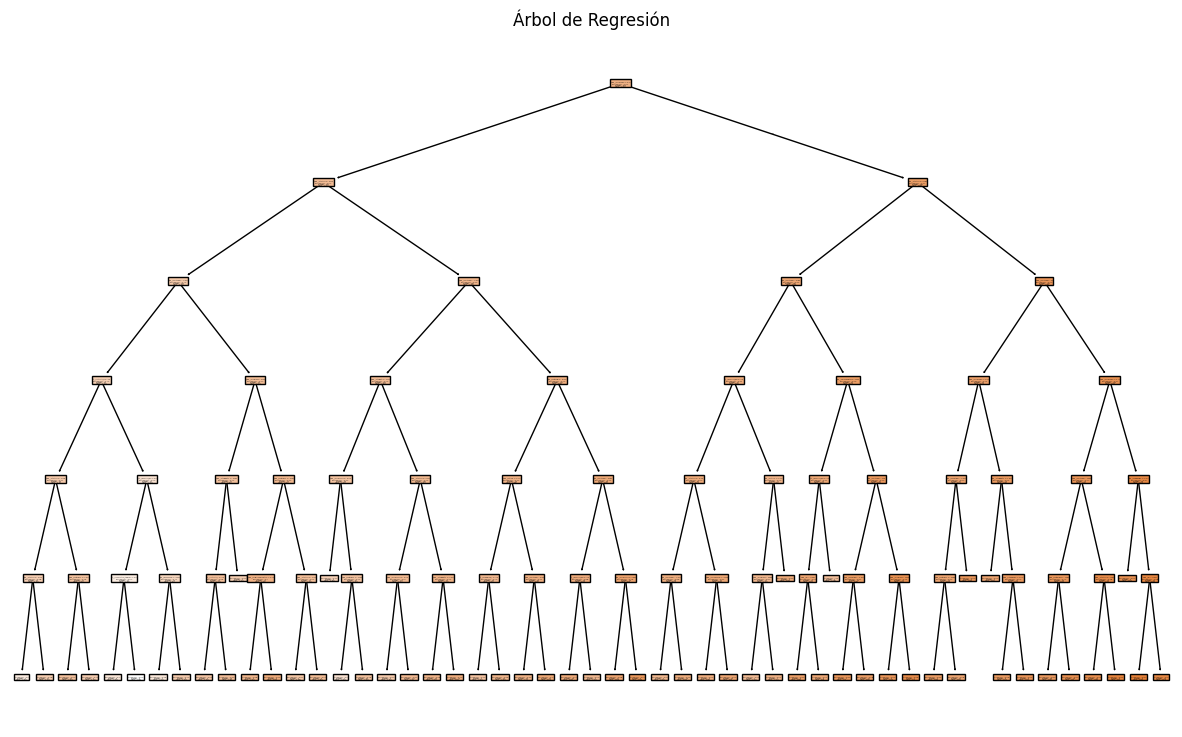

In [59]:
if not os.path.exists('imagenes'):
    os.makedirs('imagenes')

# Evaluación del modelo
best_model = modelo1.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R² Score: {r2}')

# Visualización del árbol
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
regressor = best_model.named_steps['regressor']

# Definir el nombre del archivo para la imagen
image_filename = "imagenes/modelo_arbol_regresion.png"

if not os.path.exists(image_filename):

    # Graficar el árbol de regresión
    plt.figure(figsize=(15, 9))
    plot_tree(regressor, filled=True, feature_names=feature_names)
    plt.title('Árbol de Regresión')

    plt.savefig(image_filename)
    print(f"Imagen guardada como {image_filename}")

plt.figure(figsize=(15, 9))
plot_tree(regressor, filled=True, feature_names=feature_names)
plt.title('Árbol de Regresión')
plt.show()
plt.close()


**Resultados:**

El modelo de árbol de regresión presenta un desempeño aceptable en la predicción del precio de las casas. Con un Error Cuadrático Medio (MSE) de 0.2538, el margen de error en las predicciones es relativamente bajo. Además, el Coeficiente de Determinación (R²) es de 0.7515 lo que indica que el modelo explica el 75.15% de la variabilidad en los precios. Aunque es una aproximación razonable, aún hay margen de mejora.

# Mismo Modelo distinta profundidad

Crear, Entrenar y Evaluar el Modelo

In [47]:
def entrenar_evaluar_modelo(depth, X_train, y_train, X_test, y_test, preprocessor):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth, min_samples_split=10, random_state=42))
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return pipeline, mse, r2, y_pred

Dividir los Datos en Conjuntos de Entrenamiento y Prueba

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista de profundidades a probar
depth_values = [4, 5, 7]


resultados = []

Entrenar y Evaluar Modelos con Diferentes Profundidades

Modelo con max_depth=4 -> MSE: 0.2633, R²: 0.7422


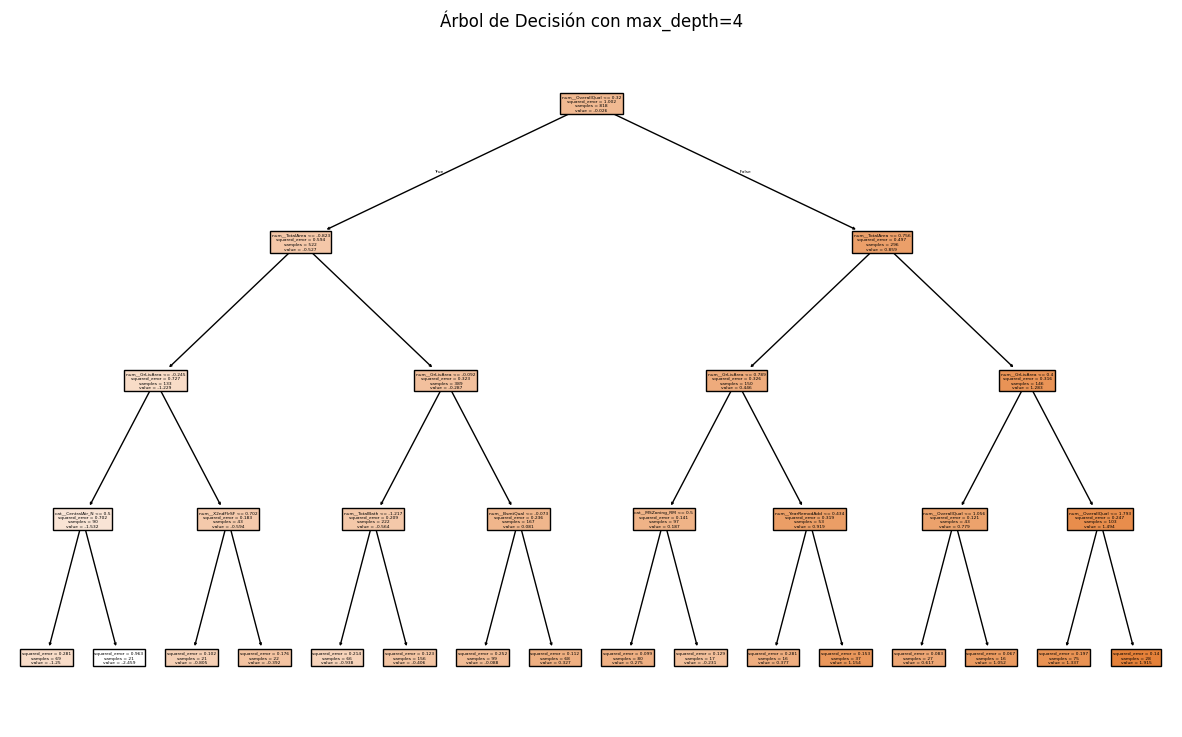

Modelo con max_depth=5 -> MSE: 0.2505, R²: 0.7548


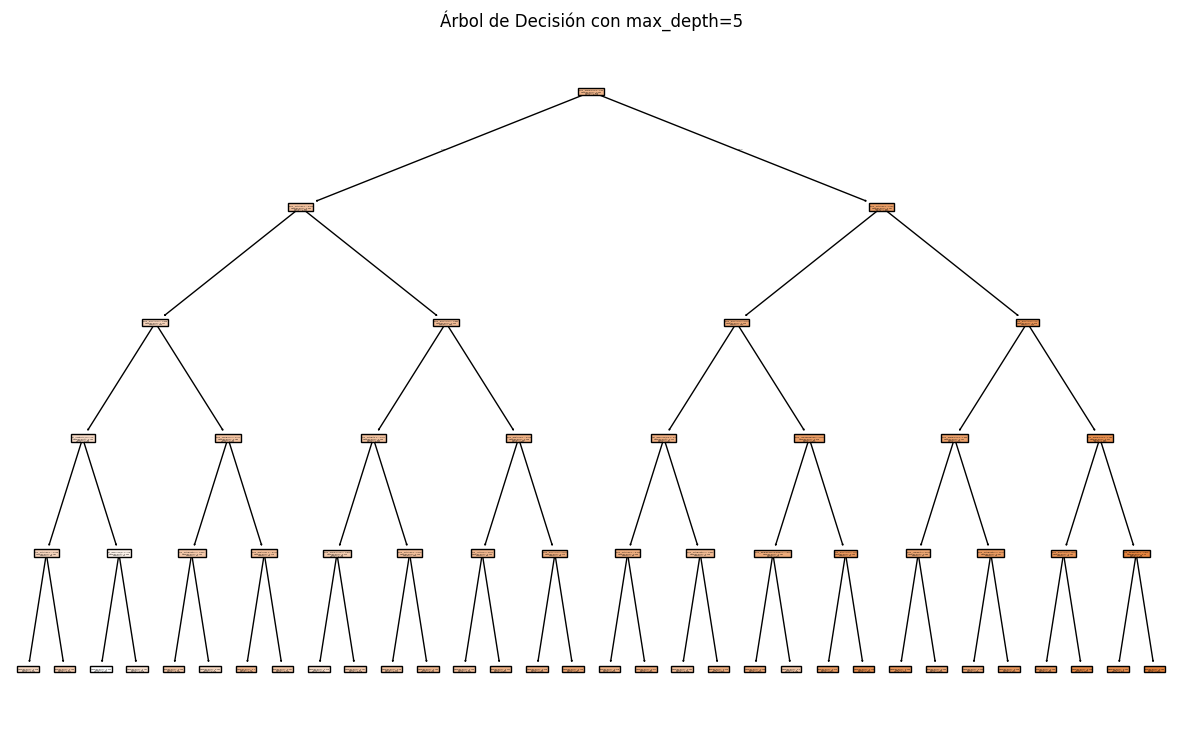

Modelo con max_depth=7 -> MSE: 0.2412, R²: 0.7639


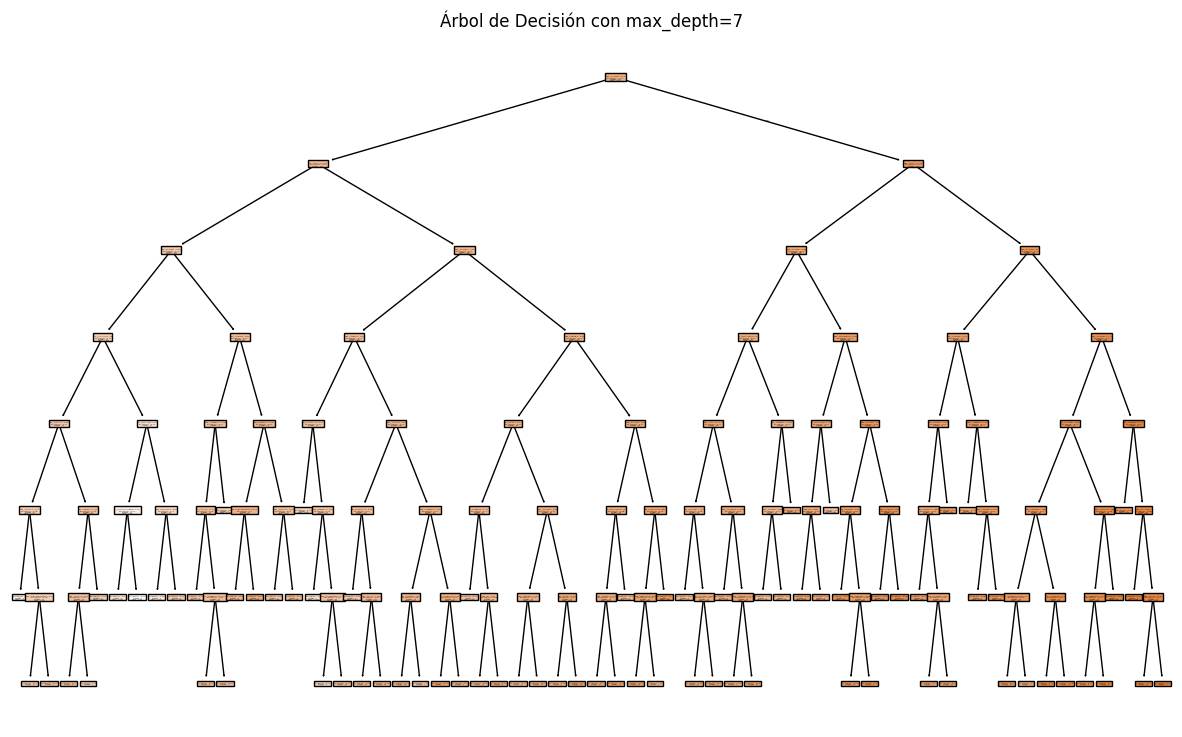

In [57]:
# Asegúrate de que la carpeta 'imagenes' exista
if not os.path.exists('imagenes'):
    os.makedirs('imagenes')

for depth in depth_values:
    pipeline, mse, r2, y_pred = entrenar_evaluar_modelo(depth, X_train, y_train, X_test, y_test, preprocessor)

    # Guardar los resultados
    resultados.append((depth, mse, r2))
    print(f'Modelo con max_depth={depth} -> MSE: {mse:.4f}, R²: {r2:.4f}')

    regressor = pipeline.named_steps['regressor']

    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    image_filename = f"imagenes/arbol_decision_max_depth_{depth}.png"

    if not os.path.exists(image_filename):
        plt.figure(figsize=(15, 9))
        plot_tree(regressor, filled=True, feature_names=feature_names)
        plt.title(f'Árbol de Decisión con max_depth={depth}')

        plt.savefig(image_filename)
        print(f"Imagen guardada como {image_filename}")

    plt.figure(figsize=(15, 9))
    plot_tree(regressor, filled=True, feature_names=feature_names)
    plt.title(f'Árbol de Decisión con max_depth={depth}')
    plt.show()

    plt.close()


Determinar el Mejor Modelo Según el MSE Más Bajo

In [60]:
mejor_modelo = min(resultados, key=lambda x: x[1])
print(f'\nEl mejor modelo tiene max_depth={mejor_modelo[0]} con MSE={mejor_modelo[1]:.4f} y R²={mejor_modelo[2]:.4f}')


El mejor modelo tiene max_depth=7 con MSE=0.2412 y R²=0.7639
